# OPEN-ENDED EXPERIMENT

# EXPERIMENT 12

###### Step 1: Problem Statement
To build an e-mail spam detection system using Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

###### Step 2: Data Collection

In [3]:
df = pd.read_csv('./dataset/spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1', 'v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###### Step 3: Exploratory Data Analysis

In [7]:
df.shape

(5572, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df = df.rename(columns={'v1': 'spam', 'v2': 'text'})

In [10]:
# Checking for NaN values in the dataset
df.isnull().sum()

spam    0
text    0
dtype: int64

In [11]:
df['spam'].value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Plot for Target variable - spam/ham')

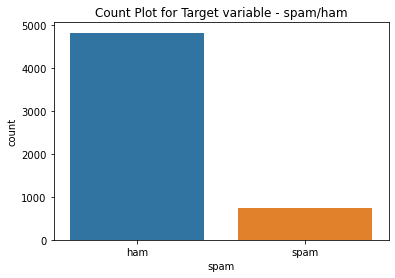

In [12]:
sns.countplot(df['spam'])
plt.title('Count Plot for Target variable - spam/ham')

###### Step 4: Data Preprocessing

Data Preprocessing on Train Data

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['spam'] = le.fit_transform(df['spam'])

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data_token = df

data_token['text'] = df['text'].apply(word_tokenize)

In [16]:
data_token.head()

,spam,text
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
lemmatizer = WordNetLemmatizer()
lem_list = []

for text_token in data_token['text']:
  text_lem = [lemmatizer.lemmatize(i) for i in text_token]
  lem_list.append(text_lem)
  
data_lemma = data_token

data_lemma['text'] = lem_list

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english')

text_lem = [''.join(i) for i in data_lemma['text']]
df_vec = data_lemma
df_vec['text'] = text_lem
df_vec = tv.fit_transform(df_vec['text'])

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(df_vec, df['spam'], train_size=0.8, random_state=1)

###### Step 5: Model Building

In [21]:
from sklearn import svm
model_svm = svm.SVC(kernel='rbf', C=1000, gamma=10, probability = True)

model_svm.fit(X_train,Y_train)

Y_pred_train_svm = model_svm.predict(X_train)
Y_pred_test_svm = model_svm.predict(X_test)

###### Step 6: Model Evaluation


Confusion Matrix:



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


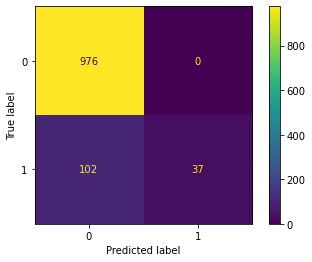

In [23]:
from sklearn.metrics import plot_confusion_matrix
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_svm, X_test, Y_test) 

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, plot_confusion_matrix

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_svm)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_svm)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_svm)))
print('Precision Score: ' + str(precision_score(Y_test, Y_pred_test_svm)))
print('F1 Score: ' + str(f1_score(Y_test, Y_pred_test_svm)))


Train accuracy: 1.0
Test accuracy: 0.9085201793721973
Recall Score: 0.26618705035971224
Precision Score: 1.0
F1 Score: 0.4204545454545454


In [25]:
print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_svm))


Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       976
           1       1.00      0.27      0.42       139

    accuracy                           0.91      1115
   macro avg       0.95      0.63      0.69      1115
weighted avg       0.92      0.91      0.88      1115



In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

Y_proba_test_svm = model_svm.predict_proba(X_test)
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_svm[:,1])))


ROC AUC Score: 0.9507865019459842
